In [85]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import cv2
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

In [0]:
# path : /content/gdrive/My Drive/Datasets/Landscapes 
path = "/content/gdrive/My Drive/Datasets/Landscapes_snapshots"

In [88]:
images = []
import os
for dirname, _, filename in os.walk(path) :
  for files in filename :
    i =  os.path.join(dirname, files)
    print(i)
    images.append(i)

/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000754 (3).jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000756 (3).jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000743 (2).jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000755.jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000753 (2).jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000753.jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000750.jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000771.jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000780 (3).jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000782 (2).jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000763.jpg
/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000777.jpg
/content/gdrive/My Drive/Dat

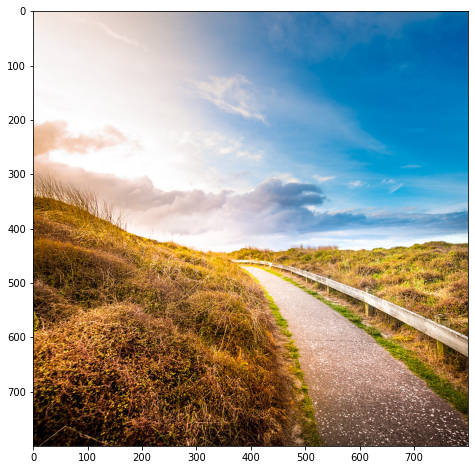

In [89]:
sample_image = cv2.imread("/content/gdrive/My Drive/Datasets/Landscapes_snapshots/landscapes/00000006.jpg")
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (12, 8))
plt.imshow(sample_image, cmap = "gray")
plt.grid(False)

# The LAB Color-Space

The Lab color space has three components.

*   L – Lightness ( Intensity )
*   a – color component ranging from Green to Magenta.
*   b – color component ranging from Blue to Yellow.

The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color.

It has the following properties.


1.   Perceptually uniform color space which approximates how we perceive color.
2.   Independent of device ( capturing or displaying ).

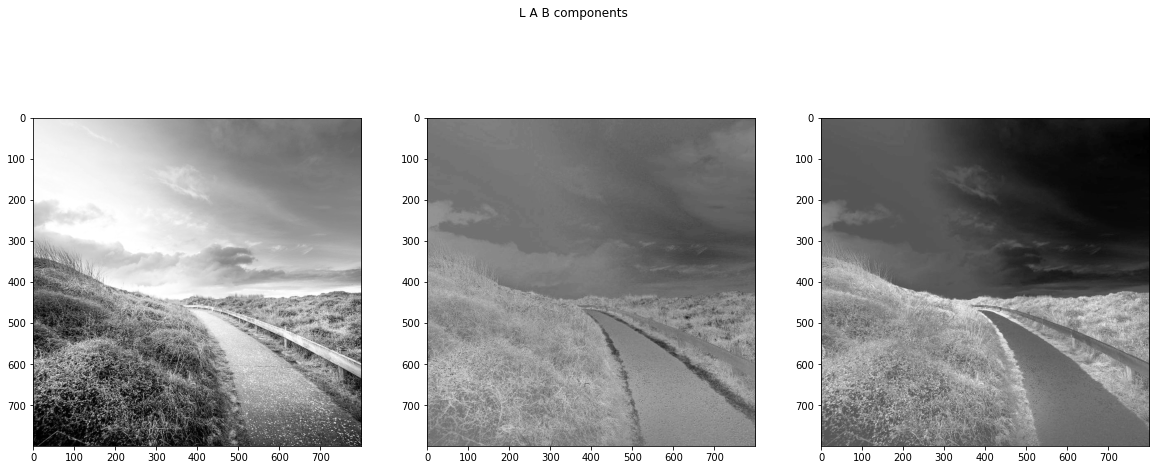

In [90]:
lab_image = cv2.cvtColor(sample_image, cv2.COLOR_RGB2LAB)
l, a, b =  lab_image[:,:, 0], lab_image[:,:, 1], lab_image[:,:, 2] 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 8))
fig.suptitle("L A B components")

ax1.imshow(l, cmap = "gray")
ax1.grid(False)

ax2.imshow(a, cmap = "gray")
ax2.grid(False)

ax3.imshow(b, cmap = "gray")
ax3.grid(False)

In [91]:
len(images)

4332

In [92]:
print("Number of images = ", len(images))
print("shape of an image ", sample_image.shape) # this is just to get the idea about image quality. Resize() function will be applied later to bring all of them to same dimensions.

Number of images =  4332
shape of an image  (800, 800, 3)


In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1 / 255.0)

In [0]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 400
IMAGE_WIDTH = 400
STEPS_PER_EPOCH = np.ceil(len(images)/BATCH_SIZE)

In [95]:
train_data_gen = image_generator.flow_from_directory(directory = path, 
                                                     batch_size= BATCH_SIZE, shuffle = True,
                                                     target_size = (IMAGE_WIDTH, IMAGE_HEIGHT))

Found 4332 images belonging to 1 classes.


In [0]:
# dim(image_batch) = (32, 400, 400, 3)
def show_batch(image_batch):
  plt.figure(figsize = (20, 20))
  for n in range(25) : 
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(image_batch[n], cmap = "gray")
    plt.axis("off")
    plt.grid(False)

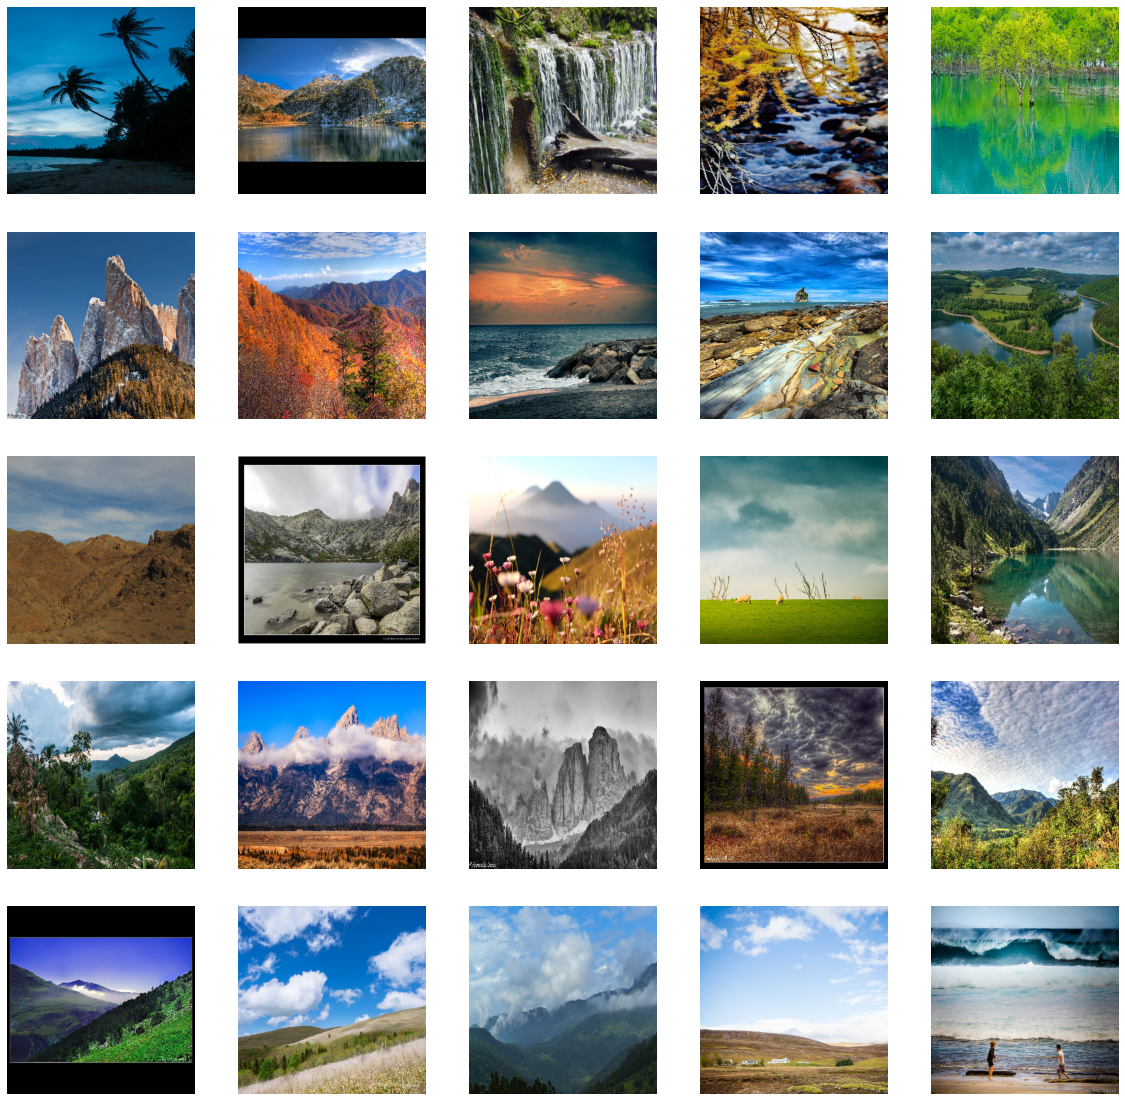

In [136]:
image_batch, _ = next(train_data_gen)
show_batch(image_batch)